---

# <center>★ AI / ML Project - Email Spam Detection ★

---

<img src="e.png" style="width: 250px;"/>

---

### Description:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

The dataset, taken from the UCI ML repository, contains about 4600 emails labelled as **spam** or **ham**. 

The dataset can be downloaded here: https://archive.ics.uci.edu/ml/datasets/spambase

### Objective:
- Understand the Dataset & cleanup (if required).
- Build classification models to predict whether or not the email spam.
- Compare the evaluation metrics of vaious classification algorithms.

---

## <center>1. Data Exploration

In [134]:
#Importing the basic librarires

import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [135]:
#Importing the dataset

df = pd.read_csv('Spam.csv')
df.reset_index(drop=True, inplace=True)
original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1



Inference: The Datset consists of 58 features & 4601 samples.


In [136]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [137]:
#Checking the stats of all the columns

display(df.describe())

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


**Inference:** The stats seem to be fine, let us gain more undestanding by visualising the dataset.

---

## <center> 2. Exploratory Data Analysis (EDA)

            Target Variable Distribution           


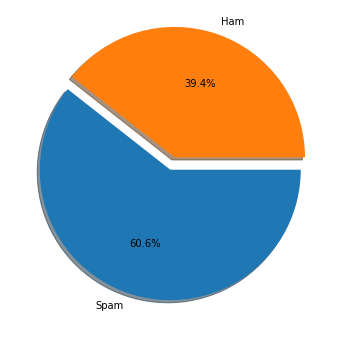

In [138]:
#Let us first analyze the distribution of the target variable

print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df.spam.value_counts(), labels=['Spam','Ham'], counterclock=False, shadow=True, 
        explode=[0,0.1], autopct='%1.1f%%', radius=1)
plt.show()

**Inference:** The Target Variable seems to be slightly imbalanced! We can try to fix this later on...

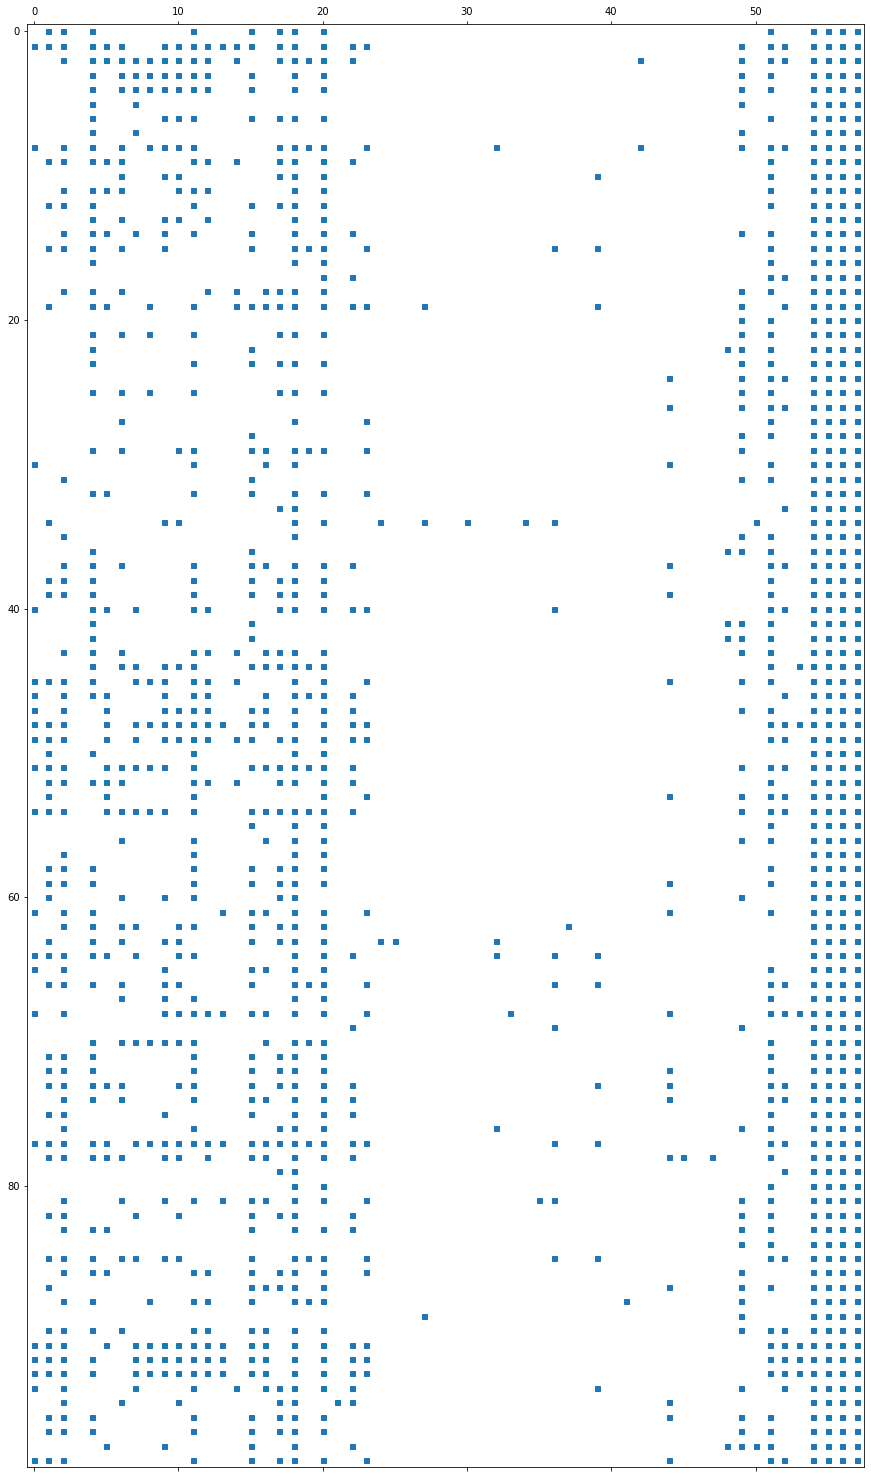

In [139]:
# Visualising the Sparse Matrix

plt.figure(figsize=[15,30])
plt.title('')
plt.spy(df[:100].values, precision = 0.1, markersize = 5)
plt.show()

**Inference:** The work embedding seem to be sparse to some extend. It will be benefecial to perform Feature Extraction on the dataset.

---

## <center> 3. Data Preprocessing

In [140]:
#Check for empty elements

print(df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset doesn\'t have any null elements')

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [141]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = original_df.shape

df1 = df.drop_duplicates()

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {r-df1.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 391


In [142]:
#Fixing the imbalance using SMOTE Technique
from imblearn.over_sampling import SMOTE

print('Original class distribution:')
print(df1.spam.value_counts())

xf = df1.columns
X = df1.drop(['spam'],axis=1)
Y = df1.spam

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df2 = pd.DataFrame(X, columns=xf)
df2['spam'] = Y
df = df2.copy()

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
0    2531
1    1679
Name: spam, dtype: int64

Class distribution after applying SMOTE Technique:
1    2531
0    2531
Name: spam, dtype: int64


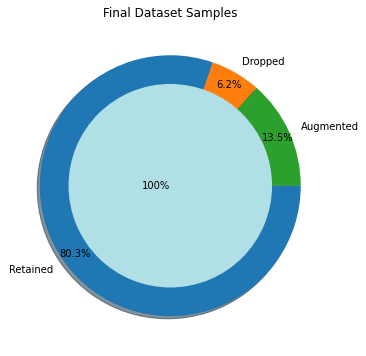


Inference:The final dataset after cleanup has 58 samples & 5062 rows.


In [143]:
#Final Dataset size after performing Preprocessing

plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df1.shape[0], df2.shape[0]-df1.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} rows.'.format(df.shape[1], df.shape[0]))

---

## <center> 4. Data Manipulation

In [144]:
#Splitting the data intro training & testing sets

from sklearn.model_selection import train_test_split

X = df.drop(['spam'],axis=1)
Y = df.spam
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (5062, 57) (5062,) 
Training set  --->  (4049, 57) (4049,) 
Testing set   --->  (1013, 57)  (1013,)


In [146]:
#Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(130))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(130))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                              Standardardization on Training set                                              


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,...,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03
mean,-8.774299e-18,-3.421977e-17,2.105832e-17,-2.105832e-17,-7.633640e-17,-1.930346e-17,7.019439e-18,5.527808e-17,-1.579374e-17,5.615551e-17,...,6.142009e-18,-7.019439e-18,-2.500675e-17,1.842603e-17,-3.948435e-18,1.272273e-17,1.842603e-17,-7.019439e-18,6.142009e-18,3.860692e-17
std,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,...,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00
min,-3.848209e-01,-3.021283e-01,-6.204900e-01,-5.099345e-02,-5.184420e-01,-3.879056e-01,-3.495375e-01,-2.902920e-01,-3.516406e-01,-4.076715e-01,...,-1.076490e-01,-1.628463e-01,-4.821565e-01,-1.907895e-01,-3.723555e-01,-3.486497e-01,-1.173898e-01,-1.376855e-01,-2.581029e-01,-4.866704e-01
25%,-3.848209e-01,-3.021283e-01,-6.204900e-01,-5.099345e-02,-5.184420e-01,-3.879056e-01,-3.495375e-01,-2.902920e-01,-3.516406e-01,-4.076715e-01,...,-1.076490e-01,-1.628463e-01,-4.821565e-01,-1.907895e-01,-3.723555e-01,-3.486497e-01,-1.173898e-01,-1.186868e-01,-2.287164e-01,-4.192525e-01
50%,-3.848209e-01,-3.021283e-01,-6.204900e-01,-5.099345e-02,-5.184420e-01,-3.879056e-01,-3.495375e-01,-2.902920e-01,-3.516406e-01,-4.076715e-01,...,-1.076490e-01,-1.628463e-01,-2.301811e-01,-1.907895e-01,-2.773250e-01,-3.486497e-01,-1.173898e-01,-9.815125e-02,-1.867357e-01,-3.128819e-01
75%,-1.446444e-01,-3.021283e-01,3.714112e-01,-5.099345e-02,1.950774e-01,-2.085716e-01,-2.764632e-01,-2.902920e-01,-3.516406e-01,6.527240e-02,...,-1.076490e-01,-1.628463e-01,1.495080e-01,-1.907895e-01,8.922111e-02,3.263115e-02,-1.173898e-01,-5.406356e-02,-4.819949e-02,-3.122455e-02
max,1.519234e+01,2.528543e+01,9.703380e+00,3.071592e+01,1.375195e+01,2.045979e+01,1.735882e+01,2.655430e+01,1.719518e+01,2.732820e+01,...,3.401579e+01,1.890758e+01,3.317901e+01,3.224967e+01,3.637050e+01,2.117020e+01,5.147211e+01,2.990457e+01,4.167219e+01,2.324446e+01



                                               Standardardization on Testing set                                               


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,...,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,0.020391,0.091425,0.027430,-0.025254,-0.018394,-0.006967,-0.001156,-0.013856,-0.041590,0.040398,...,-0.041625,-0.004192,-0.038649,-0.021352,-0.016992,-0.057004,0.042747,0.026158,-0.015995,-0.045360
std,1.054076,1.614216,1.049338,0.637386,0.860147,0.899556,0.955902,0.866776,0.828783,0.992587,...,0.569471,1.092140,0.654569,1.577439,0.688885,0.683162,1.404573,1.104919,0.599969,0.837440
min,-0.384821,-0.302128,-0.620490,-0.050993,-0.518442,-0.387906,-0.349538,-0.290292,-0.351641,-0.407671,...,-0.107649,-0.162846,-0.482157,-0.190789,-0.372356,-0.348650,-0.117390,-0.137685,-0.258103,-0.486670
25%,-0.384821,-0.302128,-0.620490,-0.050993,-0.518442,-0.387906,-0.349538,-0.290292,-0.351641,-0.407671,...,-0.107649,-0.162846,-0.482157,-0.190789,-0.372356,-0.348650,-0.117390,-0.118703,-0.232914,-0.425245
50%,-0.384821,-0.302128,-0.620490,-0.050993,-0.518442,-0.387906,-0.349538,-0.290292,-0.351641,-0.407671,...,-0.107649,-0.162846,-0.250891,-0.190789,-0.271668,-0.348650,-0.117390,-0.099420,-0.199330,-0.329362
75%,-0.159387,-0.302128,0.411897,-0.050993,0.223618,-0.210629,-0.349538,-0.290292,-0.351641,0.172066,...,-0.107649,-0.162846,0.142605,-0.190789,0.076159,-0.011690,-0.117390,-0.057262,-0.048199,-0.022235
max,9.119307,38.079208,6.869376,20.137534,8.400551,7.766807,7.250196,8.480715,4.718923,10.584375,...,11.255458,18.986182,6.186564,47.482788,7.240724,6.956932,34.040591,18.026763,5.333723,13.130263


---

## <center> 5. Feature Selection/Extraction

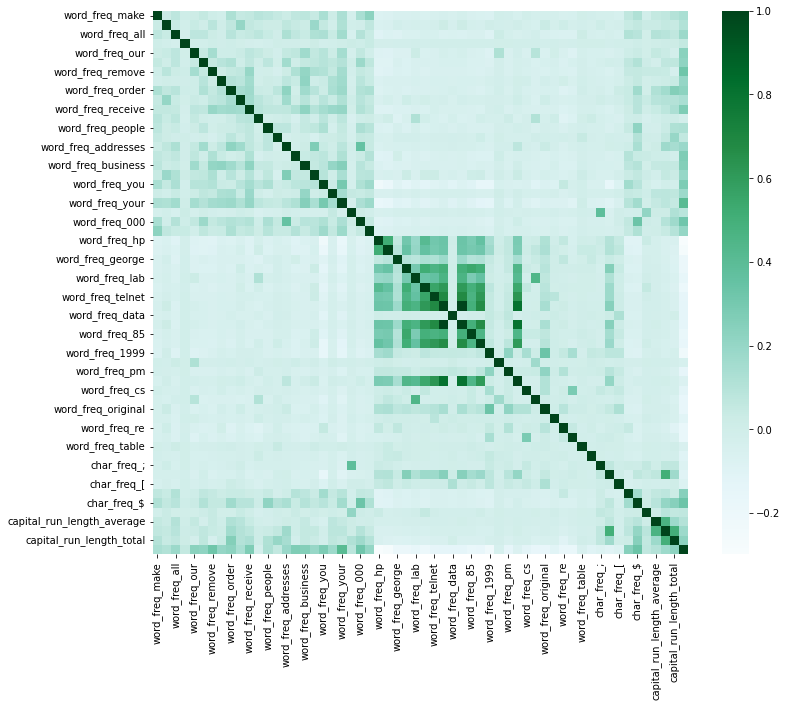

In [22]:
#Checking the correlation

plt.figure(figsize=[12,10])
sns.heatmap(df.corr(), cmap='BuGn')#, vmin=-1, vmax=1)
plt.show()

**Inference:** Correlation plt between the variables convey lot of information about the realationship betweem them. But it difficult to derive proper insights as the feature space is too large. We can try Feature Extraction Techniques to get lesser features, covering most of the variability...

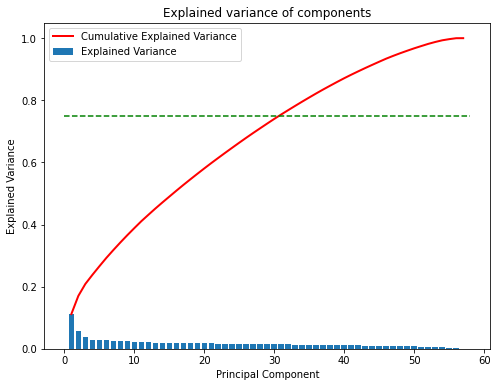

In [23]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.75,0.75],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.show()

**Inference:** We shall try to capture 75% of the variance explained by the PCA model, which boils down to nearly 30 pca components.

In [68]:
#Applying PCA Transformations

pca = PCA(n_components=32)

Train_X_std_pca = pca.fit_transform(Train_X_std)
print('The shape of final transformed training feature set:')
print(Train_X_std_pca.shape)
Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

Test_X_std_pca = pca.transform(Test_X_std)
print('\nThe shape of final transformed testing feature set:')
print(Test_X_std_pca.shape)
Test_X_std_pca = pd.DataFrame(Test_X_std_pca)

The shape of final transformed training feature set:
(4049, 32)

The shape of final transformed testing feature set:
(1013, 32)


---

## <center> 6. Predictive Modeling

In [89]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((8,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SVM)','K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0,0.0


In [121]:
#Let us define functions to summarise the Prediction's scores .

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, precision_score, recall_score

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred),3)*100
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred),3)*100
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred),3)*100
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred),3)*100
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100))
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

---

## 1. Logistic Regression:

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 92.80000000000001%
F1 Score = 92.80000000000001%

 Confusiton Matrix:
 [[484  29]
 [ 44 456]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       513
           1       0.94      0.91      0.93       500

    accuracy                           0.93      1013
   macro avg       0.93      0.93      0.93      1013
weighted avg       0.93      0.93      0.93      1013



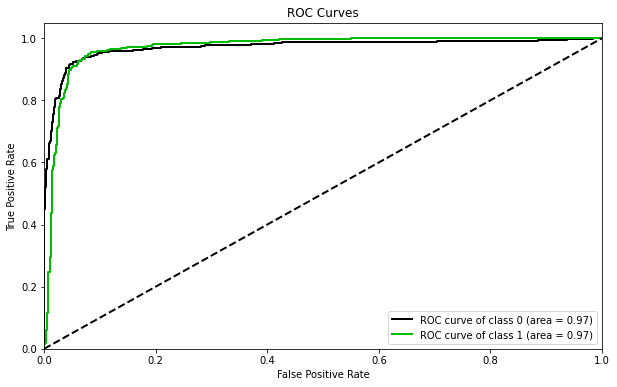

In [122]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression().fit(Train_X_std_pca, Train_Y)
pred = LR.predict(Test_X_std_pca)
pred_prob = LR.predict_proba(Test_X_std_pca)
Classification_Summary(pred,pred_prob,0)

---

## 2. Decisoin Tree Classfier:

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 89.7%
F1 Score = 89.7%

 Confusiton Matrix:
 [[458  55]
 [ 49 451]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       513
           1       0.89      0.90      0.90       500

    accuracy                           0.90      1013
   macro avg       0.90      0.90      0.90      1013
weighted avg       0.90      0.90      0.90      1013



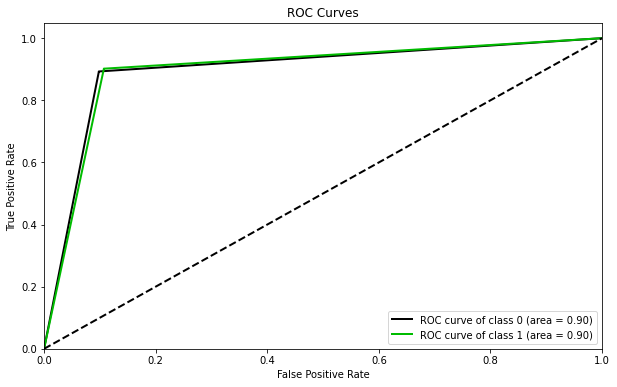

In [123]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier().fit(Train_X_std_pca, Train_Y)
pred = DT.predict(Test_X_std_pca)
pred_prob = DT.predict_proba(Test_X_std_pca)
Classification_Summary(pred,pred_prob,1)

---

## 3. Random Forest Classfier:

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 94.39999999999999%
F1 Score = 94.39999999999999%

 Confusiton Matrix:
 [[488  25]
 [ 32 468]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       513
           1       0.95      0.94      0.94       500

    accuracy                           0.94      1013
   macro avg       0.94      0.94      0.94      1013
weighted avg       0.94      0.94      0.94      1013



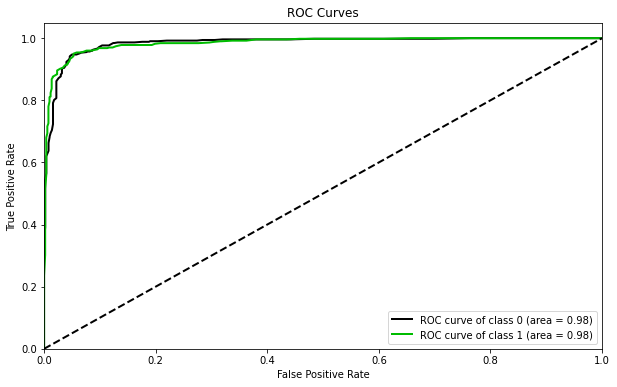

In [124]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier().fit(Train_X_std_pca, Train_Y)
pred = RF.predict(Test_X_std_pca)
pred_prob = RF.predict_proba(Test_X_std_pca)
Classification_Summary(pred,pred_prob,2)

---

## 4. Naive Bayes Classfier:

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 71.2%
F1 Score = 69.5%

 Confusiton Matrix:
 [[246 267]
 [ 25 475]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.48      0.63       513
           1       0.64      0.95      0.76       500

    accuracy                           0.71      1013
   macro avg       0.77      0.71      0.70      1013
weighted avg       0.78      0.71      0.70      1013



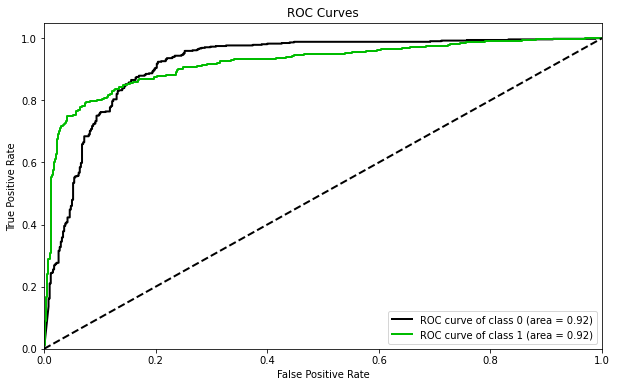

In [125]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB().fit(Train_X_std_pca, Train_Y)
pred = NB.predict(Test_X_std_pca)
pred_prob = NB.predict_proba(Test_X_std_pca)
Classification_Summary(pred,pred_prob,3)

---

## 5. Support Vector Machine Classfier:

<<<----------------------------------- Evaluating Support Vector Machine (SVM) ----------------------------------->>>

Accuracy = 93.2%
F1 Score = 93.2%

 Confusiton Matrix:
 [[486  27]
 [ 42 458]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       513
           1       0.94      0.92      0.93       500

    accuracy                           0.93      1013
   macro avg       0.93      0.93      0.93      1013
weighted avg       0.93      0.93      0.93      1013



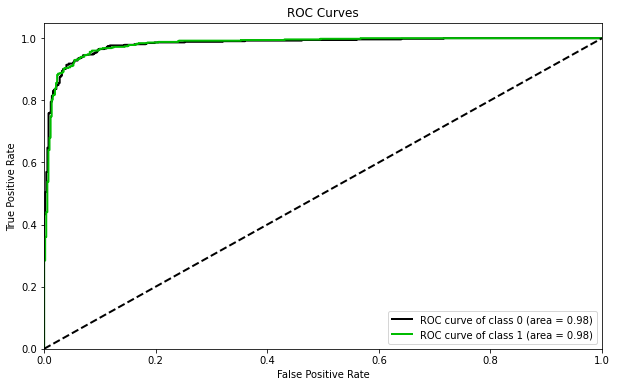

In [126]:
from sklearn.svm import SVC

SVM = SVC(probability=True).fit(Train_X_std_pca, Train_Y)
pred = SVM.predict(Test_X_std_pca)
pred_prob = SVM.predict_proba(Test_X_std_pca)
Classification_Summary(pred,pred_prob,4)

---

## 6. K-Nearest Neighbours Classfier:

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 91.7%
F1 Score = 91.7%

 Confusiton Matrix:
 [[466  47]
 [ 37 463]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       513
           1       0.91      0.93      0.92       500

    accuracy                           0.92      1013
   macro avg       0.92      0.92      0.92      1013
weighted avg       0.92      0.92      0.92      1013



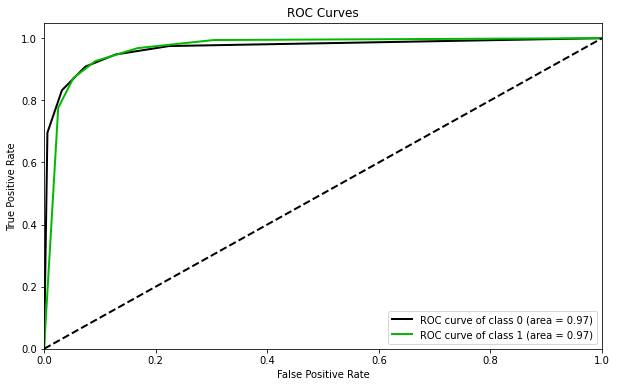

In [127]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier().fit(Train_X_std_pca, Train_Y)
pred = KNN.predict(Test_X_std_pca)
pred_prob = KNN.predict_proba(Test_X_std_pca)
Classification_Summary(pred,pred_prob,5)

---

## 7. Gradient Boosting Classfier:

<<<----------------------------------- Evaluating Gradient Boosting (GB) ----------------------------------->>>

Accuracy = 94.1%
F1 Score = 94.1%

 Confusiton Matrix:
 [[484  29]
 [ 31 469]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       513
           1       0.94      0.94      0.94       500

    accuracy                           0.94      1013
   macro avg       0.94      0.94      0.94      1013
weighted avg       0.94      0.94      0.94      1013



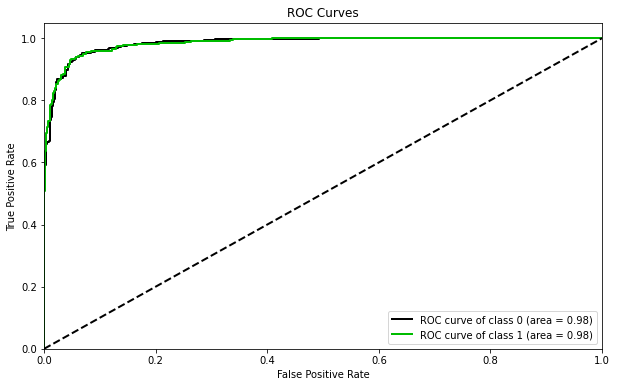

In [128]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier().fit(Train_X_std_pca, Train_Y)
pred = GB.predict(Test_X_std_pca)
pred_prob = GB.predict_proba(Test_X_std_pca)
Classification_Summary(pred,pred_prob,6)

---

## 8. Extreme Gradient Boosting Classfier:

[21:11:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<<<----------------------------------- Evaluating Extreme Gradient Boosting (XGB) ----------------------------------->>>

Accuracy = 94.69999999999999%
F1 Score = 94.69999999999999%

 Confusiton Matrix:
 [[485  28]
 [ 26 474]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       513
           1       0.94      0.95      0.95       500

    accuracy                           0.95      1013
   macro avg       0.95      0.95      0.95      1013
weighted avg       0.95      0.95      0.95      1013



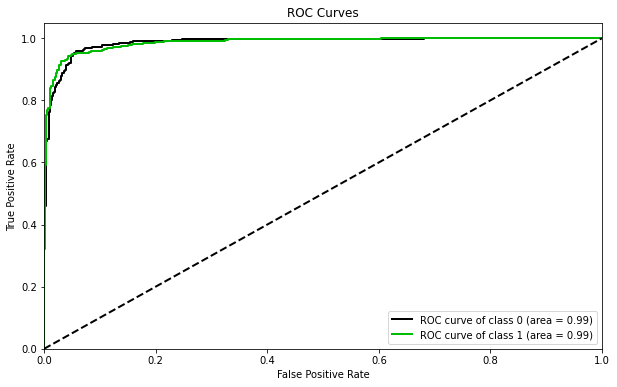

In [129]:
from xgboost import XGBClassifier

XGB = XGBClassifier().fit(Train_X_std_pca, Train_Y)
pred = XGB.predict(Test_X_std_pca)
pred_prob = XGB.predict_proba(Test_X_std_pca)
Classification_Summary(pred,pred_prob,7)

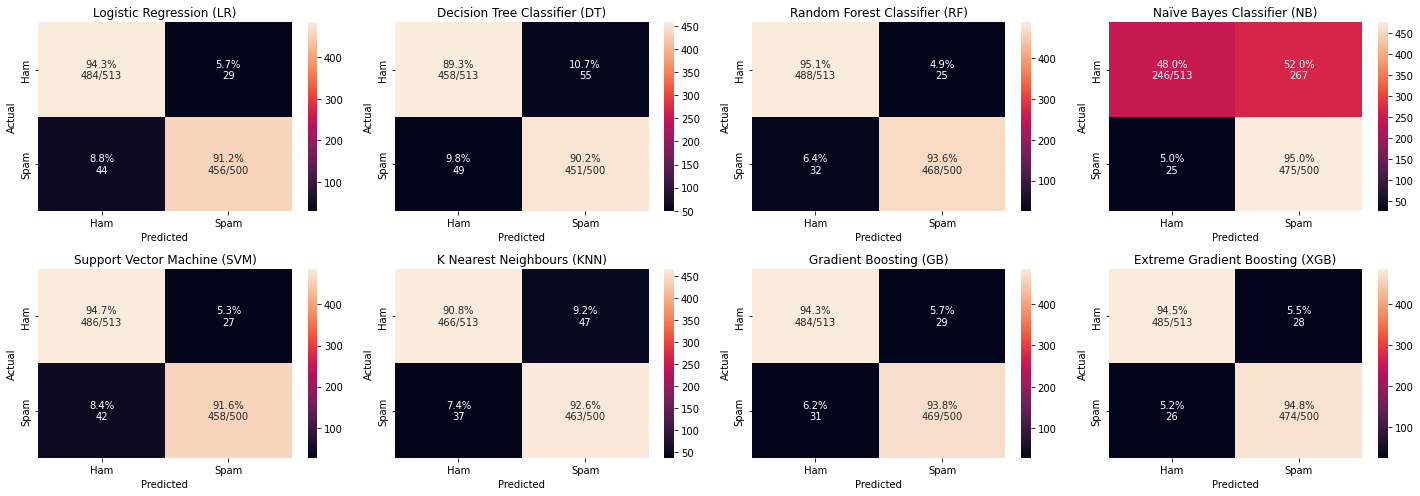

In [130]:
#Plotting Confusion-Matrix of all the predictive Models

labels=['Ham','Spam']

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,7])
    
    for i in range(len(all_models)):
        plt.subplot(2,4,i+1)
        pred = all_models[i].predict(Test_X_std_pca)
        plot_cm(Test_Y, pred)
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,SVM,KNN,GB,XGB])

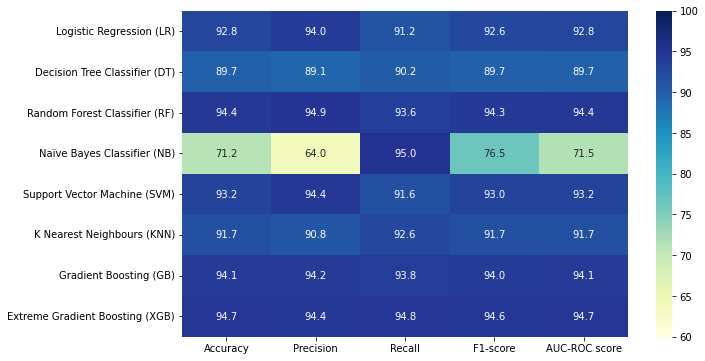

In [131]:
#Comparing all the models Scores

#plt.figure(figsize=[12,5])
sns.heatmap(Evaluation_Results, annot=True, vmin=60.0, vmax=100.0, cmap='YlGnBu', fmt='.1f')
plt.show()

**Insights:** For the current problem statement, it is more important to focus on the true positives, and is relatively fine to miscalassify a spam email, but not have a regular mail classified as spam. Hence we shall focus mainly on the Precision Score to evaluate the current model.

---

## <center> 7. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was small totally around 4600 samples & after preprocessing 6.2% of the datasamples were dropped. 
- The spam emails were 20% more than non-spam ones, hence SMOTE Technique was applied on the data to  balance the classes, adding 13.5% more samples to the dataset.
- Visualising the distribution of data & their relationships, helped us to get some insights on the sparse matrix distribution.
- The large feature set was reduced by Feature Extraction Technique - PCA, reducing to 30 features.
- Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
- The ensemble & boosting algorithms perform the best on the current dataset, followed by Support Vector Machines.
- Yet it wise to also consider simpler model like Logistic Regression as it is more generalisable & is computationally less expensive.

In [ ]:
<<<----------------------------------------------------THE END------------------------------------------------------------->>>